In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('cookie_cats.csv')

In [3]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [93]:
df.shape

(90189, 5)

In [94]:
def summary(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtype'])
    summary['missing_total']= df.isnull().sum()
    summary['missing_%']= df.isnull().sum()/len(df)*100
    summary['unique']= df.nunique()
    
    return summary
    
    
analysis = summary(df)

In [95]:
analysis

,dtype,missing_total,missing_%,unique
userid,int64,0,0.0,90189
version,object,0,0.0,2
sum_gamerounds,int64,0,0.0,942
retention_1,bool,0,0.0,2
retention_7,bool,0,0.0,2


In [5]:
#User_id A unique number that identifies each player

In [ ]:
#Whether the player was put in the control group (gate_30 - a gate at level 30) 
#or the group with the moved gate (gate_40 - a gate at level 40)

In [21]:
df['version'].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

In [22]:
#The number of game rounds played by the player during the first 14 days after install.

In [25]:
df['sum_gamerounds'].mean()

51.8724567297564

In [50]:
df.groupby('version')['sum_gamerounds'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
gate_30,44700.0,52.456264,256.716423,0.0,5.0,17.0,50.0,49854.0
gate_40,45489.0,51.298776,103.294416,0.0,5.0,16.0,52.0,2640.0


In [30]:
#From this output, we can see that there is an outlier in gate_30 
#since lower quartile, upper quartile and median is not much above mean
#Further analysis, let's graph the sum_gamerounds, to see the outliers

<Axes: xlabel='version', ylabel='sum_gamerounds'>

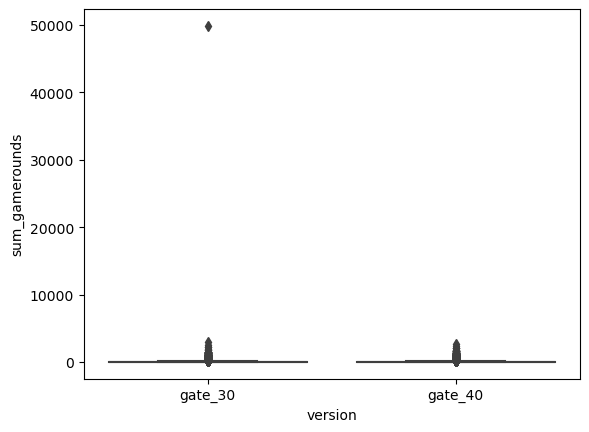

In [176]:
sns.boxplot(data=df, y='sum_gamerounds',x='version')

<Axes: ylabel='sum_gamerounds'>

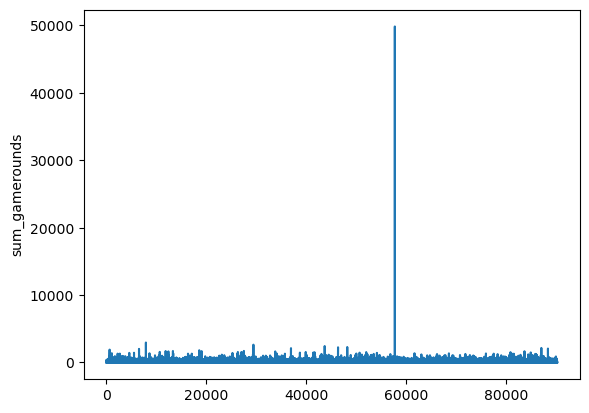

In [177]:
sns.lineplot(df['sum_gamerounds'])

In [36]:
#There is clearly an outlier in the gate_30 data. Let's drop it

In [47]:
df_dropped = df.drop(df.query('sum_gamerounds>20000').index,axis=0)

In [53]:
df_dropped.groupby('version')['sum_gamerounds'].describe() 

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
gate_30,44699.0,51.342111,102.057598,0.0,5.0,17.0,50.0,2961.0
gate_40,45489.0,51.298776,103.294416,0.0,5.0,16.0,52.0,2640.0


In [54]:
#Now, we have removed outliers. Let's boxplot the dataframe again.

<Axes: xlabel='version', ylabel='sum_gamerounds'>

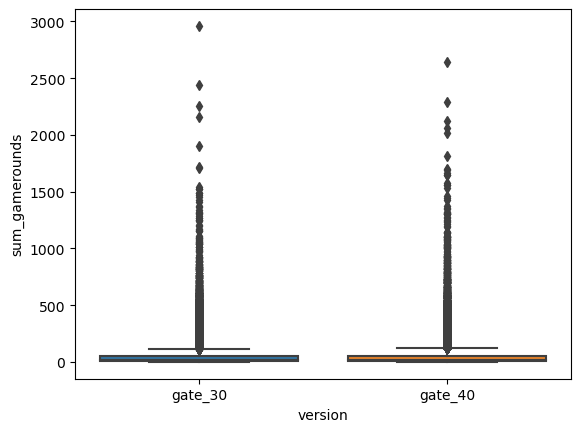

In [56]:
sns.boxplot(data=df_dropped, y='sum_gamerounds',x='version')

In [127]:
round_count=df_dropped.groupby('sum_gamerounds')['userid'].count()

Text(4.944444444444445, 0.5, 'User Count')

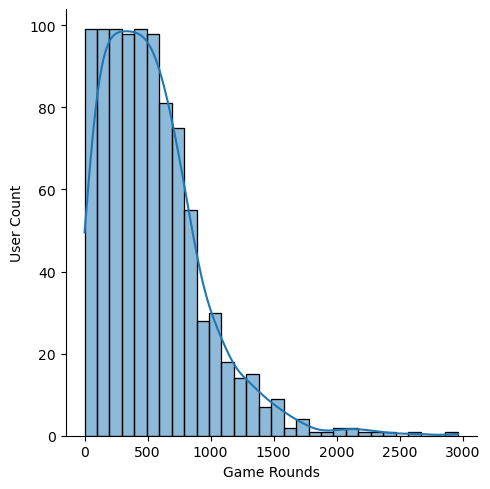

In [130]:
sns.displot(data=round_count,x='sum_gamerounds',kde= True)
plt.xlabel("Game Rounds")
plt.ylabel("User Count")

In [133]:
round_count_version=df_dropped.groupby(['sum_gamerounds','version'])['userid'].count()

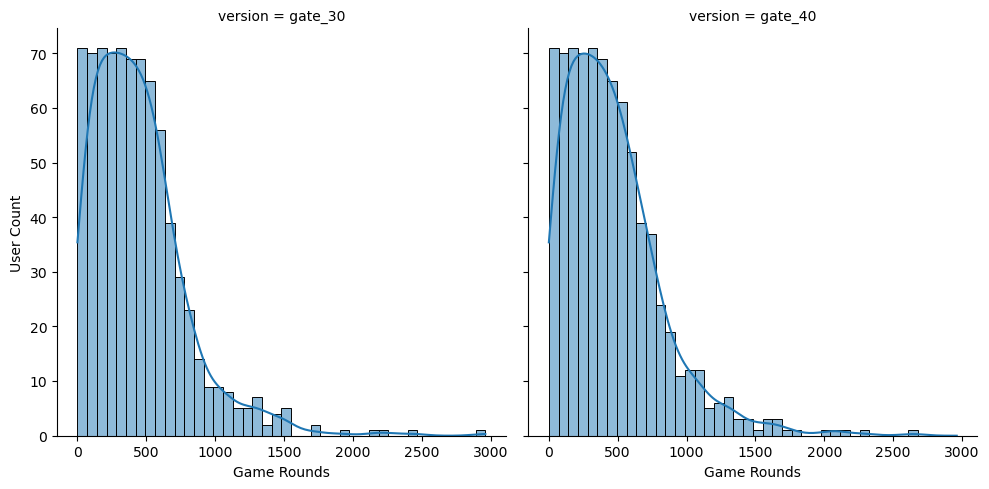

In [139]:
plt_by_version =sns.displot(data=round_count_version,x='sum_gamerounds',col='version',kde= True)
plt_by_version.set_axis_labels("Game Rounds","User Count")

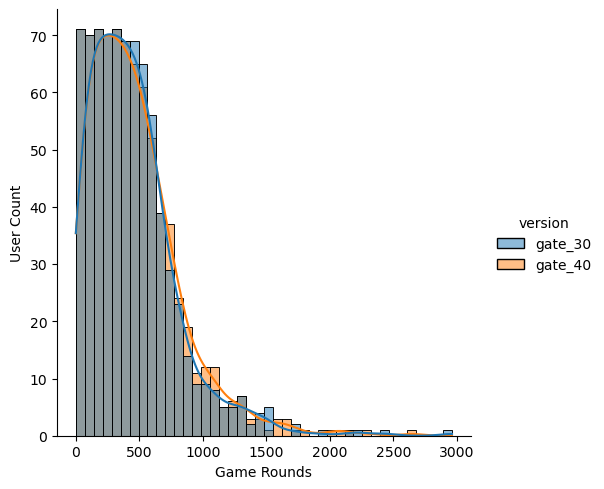

In [141]:
plt_by_version =sns.displot(data=round_count_version,x='sum_gamerounds',hue='version',kde= True)
plt_by_version.set_axis_labels("Game Rounds","User Count")

In [150]:
df_dropped[df_dropped['sum_gamerounds']==0]['userid'].count() 

#There are 3994 users that installed the game and did not play it

3994

In [151]:
df_dropped[df_dropped['sum_gamerounds']==0]

,userid,version,sum_gamerounds,retention_1,retention_7
6,1066,gate_30,0,False,False
11,2101,gate_30,0,False,False
26,3095,gate_30,0,False,False
35,4076,gate_40,0,False,False
37,4176,gate_30,0,False,False
...,...,...,...,...,...
90067,9986185,gate_30,0,False,False
90093,9988600,gate_40,0,False,False
90116,9990773,gate_30,0,False,False
90147,9994604,gate_30,0,False,False


In [153]:
dropped_round0 =df_dropped.drop(df_dropped[df_dropped['sum_gamerounds']==0].index,axis=0)

In [158]:
dropped_round0.groupby('version')['sum_gamerounds'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
gate_30,42762.0,53.667766,103.743691,1.0,6.0,18.0,53.0,2961.0
gate_40,43432.0,53.728357,105.093012,1.0,6.0,18.0,55.0,2640.0


In [173]:
new_data =dropped_round0.groupby('sum_gamerounds',as_index=False)['userid'].count()[:100]
new_data

,sum_gamerounds,userid
0,1,5538
1,2,4606
2,3,3958
3,4,3629
4,5,2992
...,...,...
95,96,135
96,97,137
97,98,139
98,99,133


<Axes: xlabel='sum_gamerounds', ylabel='userid'>

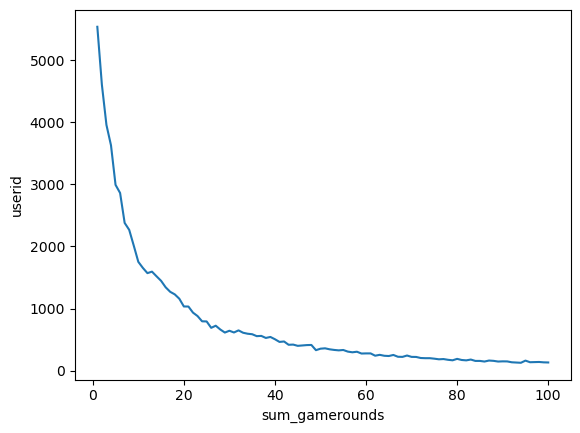

In [174]:
sns.lineplot(new_data,x='sum_gamerounds',y='userid')

In [198]:
retention = pd.DataFrame(df_dropped['retention_1'].value_counts())
retention['retention_7'] = pd.DataFrame(df_dropped['retention_7'].value_counts())
retention['retention_1_%']= df_dropped['retention_1'].value_counts(normalize=True)*100
retention['retention_7_%']= df_dropped['retention_7'].value_counts(normalize=True)*100
retention

,retention_1,retention_7,retention_1_%,retention_7_%
False,50035,73408,55.478556,81.394421
True,40153,16780,44.521444,18.605579


In [201]:
retention_by_version = pd.DataFrame(df_dropped.groupby('version')['retention_1'].value_counts())
retention_by_version['retention_7'] = pd.DataFrame(df_dropped.groupby('version')['retention_7'].value_counts())
retention_by_version['retention_1_%']=df_dropped.groupby('version')['retention_1'].value_counts(normalize=True)*100
retention_by_version['retention_7_%']=df_dropped.groupby('version')['retention_7'].value_counts(normalize=True)*100
retention_by_version

retention_1  retention_7  retention_1_%  retention_7_%
version retention_1                                                        
gate_30 False              24665        36198      55.180205      80.981677
        True               20034         8501      44.819795      19.018323
gate_40 False              25370        37210      55.771725      81.799996
        True               20119         8279      44.228275      18.200004